In [22]:
import pandas as pd 
import numpy as np
import scipy.stats as stats

In [23]:
sales = pd.read_csv('Store.csv')

In [24]:
sales.head()

,Observation,Dist_Taxi,Dist_Market,Dist_Metro,Store_Area,Items_Available,Parking,Coupon_Category,Daily_Customer_Count,Store_Sales
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,66490
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,39820
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,54010
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,53730
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,46620


In [25]:
sales.shape

(932, 10)

In [26]:
sales.isnull().sum()

Observation              0
Dist_Taxi               13
Dist_Market             13
Dist_Metro               1
Store_Area               8
Items_Available         15
Parking                  0
Coupon_Category          0
Daily_Customer_Count     0
Store_Sales              0
dtype: int64

In [27]:
sales.Parking.value_counts()

Open            372
Not Provided    227
Covered         188
No Parking      145
Name: Parking, dtype: int64

In [28]:
sales.Dist_Taxi.fillna(sales.Dist_Taxi.median(),inplace=True)

In [29]:
sales.Dist_Market.fillna(sales.Dist_Market.median(),inplace=True)

In [30]:
sales.Dist_Metro.fillna(sales.Dist_Metro.median(),inplace=True)

In [31]:
sales.Store_Area.fillna(sales.Store_Area.median(),inplace=True)

In [32]:
sales.Items_Available.fillna(sales.Items_Available.median(),inplace=True)

In [33]:
sales.isnull().sum()

Observation             0
Dist_Taxi               0
Dist_Market             0
Dist_Metro              0
Store_Area              0
Items_Available         0
Parking                 0
Coupon_Category         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

# Plotting

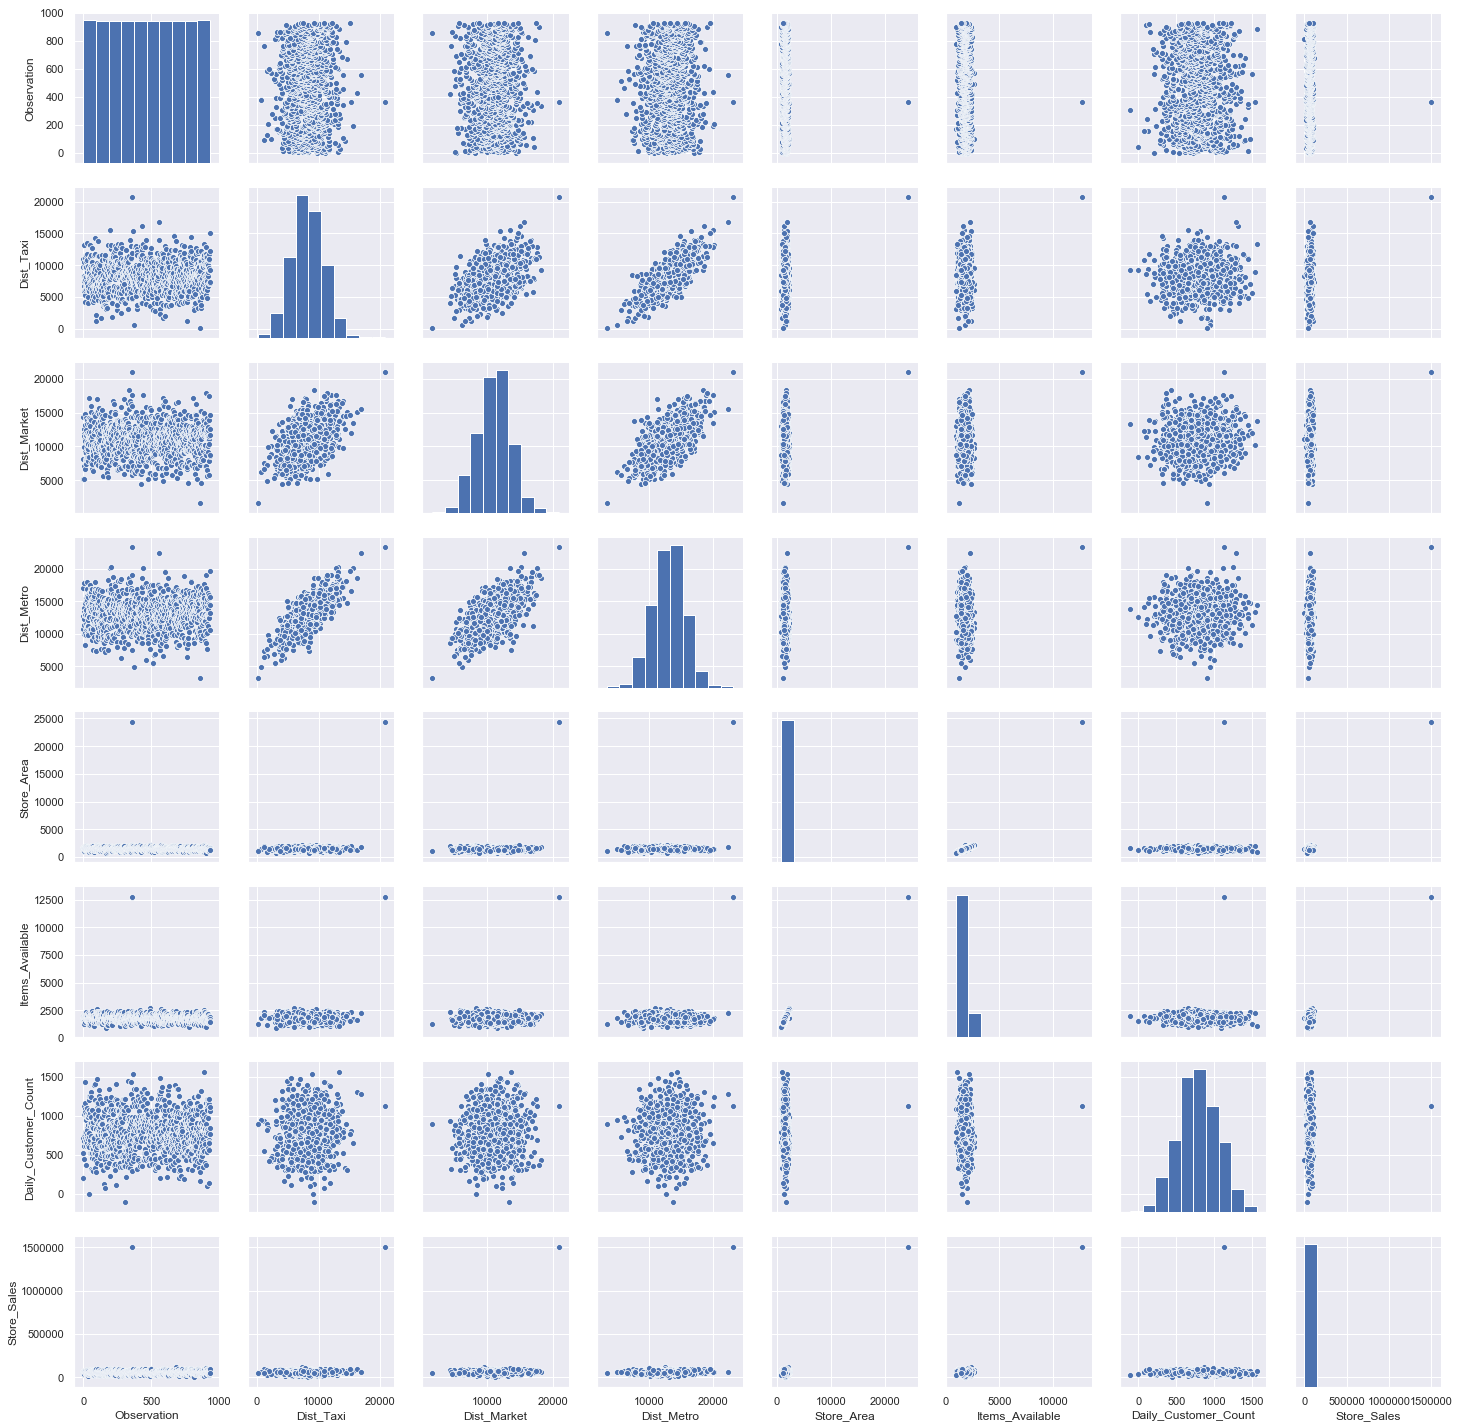

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.pairplot(sales)
plt.show();

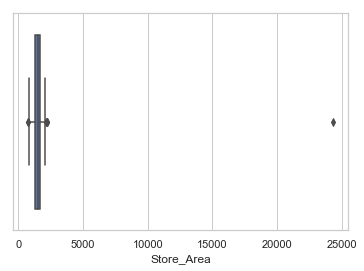

In [35]:
sns.set_style('whitegrid')
sns.boxplot(x=sales['Store_Area'])
plt.show()

In [36]:
sales[sales.Store_Area==max(sales.Store_Area)]

,Observation,Dist_Taxi,Dist_Market,Dist_Metro,Store_Area,Items_Available,Parking,Coupon_Category,Daily_Customer_Count,Store_Sales
360,361,20662.0,20945.0,23294.0,24300.0,12730.0,Covered,CAT B,1130,1500000


In [37]:
sales.drop(360,axis=0,inplace=True) #Remove the outlier

In [38]:
sales[sales.Store_Area==max(sales.Store_Area)]

,Observation,Dist_Taxi,Dist_Market,Dist_Metro,Store_Area,Items_Available,Parking,Coupon_Category,Daily_Customer_Count,Store_Sales
490,491,6063.0,8269.0,10928.0,2229.0,2667.0,Covered,CAT A,660,87410


In [40]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Observation,931.0,466.613319,269.311968,1.0,233.5,467.0,699.5,932.0
Dist_Taxi,931.0,8216.378088,2512.508699,146.0,6495.0,8230.0,9915.0,16850.0
Dist_Market,931.0,11010.077336,2506.449517,1666.0,9371.5,11161.0,12649.0,18281.0
Dist_Metro,931.0,13061.210526,2564.623517,3227.0,11301.5,13163.0,14785.5,22407.0
Store_Area,931.0,1487.116004,248.863623,775.0,1319.5,1480.5,1651.5,2229.0
Items_Available,931.0,1782.842105,295.226361,932.0,1586.5,1774.0,1977.5,2667.0
Daily_Customer_Count,931.0,785.209452,265.449171,-110.0,600.0,780.0,965.0,1560.0
Store_Sales,931.0,59301.138561,17282.831626,300.0,46580.0,58660.0,71805.0,116320.0


In [45]:
sales.Parking.value_counts()

Open            372
Not Provided    227
Covered         187
No Parking      145
Name: Parking, dtype: int64

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


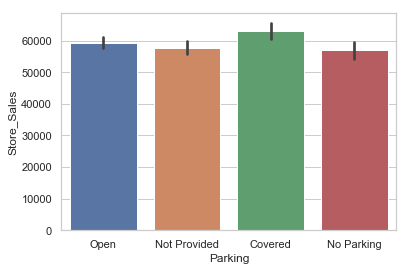

In [44]:
sns.barplot(x=sales['Parking'],y=sales['Store_Sales']) #Dash is confidence interval around mean

In [43]:
sales.groupby('Parking').Store_Sales.mean()

Parking
Covered         63109.732620
No Parking      56994.620690
Not Provided    57747.048458
Open            59233.978495
Name: Store_Sales, dtype: float64

### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$ = $\mu4$
* $H_A$: At least one $\mu$ differs 

## Anova 

In [50]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

mod = ols('Store_Sales ~ Parking',data=sales).fit()
aov_table = sm.stats.anova_lm(mod,type=1)
print(aov_table)
#sum_sq value whther it is large or not, mu1=mu2=mu3=mu4, x1bar=x2bar=x3bar=x4bar which are equal, parking variance
#F-static, if there is 4.55 and no parking, comapre this to the prop. of even being larger that is P value, p value=0.003
# which is less than 0.05 
# Which makes the difference, and parking is important 
# Now what to do next, if marking matters 

             df        sum_sq       mean_sq         F    PR(>F)
Parking     3.0  4.033839e+09  1.344613e+09  4.553203  0.003557
Residual  927.0  2.737537e+11  2.953114e+08       NaN       NaN


In [53]:
#Does covered parking (already has high sales) leads to more sales, compare parking not provided and covered sales 

# Two Sample T-Test

In [ ]:
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import  scipy.stats             as      stats  
from    statsmodels.stats.power import  ttest_power

In [55]:
sales_covered = sales.Store_Sales[sales.Parking=='Covered'] #sales when parking is covered 
sales_not_provided = sales.Store_Sales[sales.Parking=='Not Provided']

In [61]:
stats.ttest_ind(sales_not_provided,sales_covered)
#p value is wrong it is two sided, we want one sided. -3.15 is t-statics

Ttest_indResult(statistic=-3.1502380424373726, pvalue=0.0017503522949873288)

In [66]:
#so divide the p value by 2 #Covered parking gives more sales, u1 sales with not provided, u2 is sales with covered

In [67]:
 0.0017503522949873288/2 #I am interested in left had side mu1<mu2 (It mu1 is less than mu2), not mu1=! mu2 (two sided) (only gives they are diff)

0.0008751761474936644

# Avg_Sales with No. of Items

In [68]:
less = sales[sales.Items_Available<1774]
more_eq = sales[sales.Items_Available>=1774]

In [69]:
less.Store_Sales

1      39820
2      54010
3      53730
5      45260
7      37720
8      46310
9      44150
10     71280
14     66360
18     63540
21     43460
22     68890
24     50680
25     41880
29     60530
32     80140
33     14920
34     60460
36     72430
38     41570
39     62870
41     45480
43     49550
44     48140
47     35800
48     49270
53     76350
56     70450
59     48670
61     83660
       ...  
875    43030
877    55500
878    49990
879    42980
880    65970
882    63020
883    73810
886    78100
890    87220
891    41990
893    54380
894    58600
895    48950
898    39140
900    25600
904    80580
908    52050
911    88270
913    61210
916    70980
917    76740
919    52160
920    32740
921    72270
923    92370
924    34880
928    82080
929    76440
930    96610
931    54340
Name: Store_Sales, Length: 456, dtype: int64

In [71]:
t_statistic, p_value = stats.ttest_ind(less.Store_Sales, more_eq.Store_Sales)
print(p_value) #p<0.05 not, so we cannot reject null hypothesis

0.14555456301795072


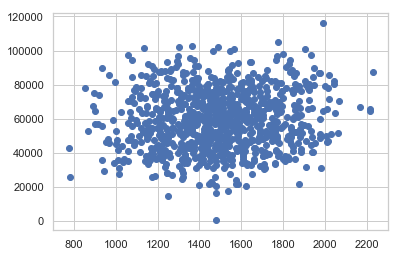

In [73]:
plt.scatter(sales.Store_Area,sales.Store_Sales)

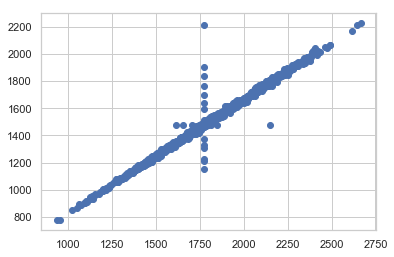

In [74]:
plt.scatter(sales.Items_Available,sales.Store_Area)

In [75]:
sales.Store_Area.median()

1480.5

In [79]:
less_area=sales[sales.Store_Area<1480.5]
more_area = sales[sales.Store_Area>=1480.5]

In [80]:
t_statistic, p_value = stats.ttest_ind(less_area.Store_Sales, more_area.Store_Sales)
print(p_value) 

0.05471936102864674


# Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression

In [83]:
x = pd.DataFrame(sales['Store_Area'])
y = pd.DataFrame(sales['Store_Sales'])

In [84]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
from statsmodels.api import add_constant 

In [87]:
x2 = add_constant(x)
log= sm.OLS(y,x2)
result = log.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Store_Sales   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     9.568
Date:                Thu, 21 Feb 2019   Prob (F-statistic):            0.00204
Time:                        15:18:32   Log-Likelihood:                -10400.
No. Observations:                 931   AIC:                         2.080e+04
Df Residuals:                     929   BIC:                         2.081e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.887e+04   3417.878     14.299      0.0

In [88]:
x = pd.DataFrame(sales['Items_Available'])
y = pd.DataFrame(sales['Store_Sales'])

In [89]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
x2 = add_constant(x)
log= sm.OLS(y,x2)
result = log.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Store_Sales   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     8.157
Date:                Thu, 21 Feb 2019   Prob (F-statistic):            0.00439
Time:                        15:21:29   Log-Likelihood:                -10401.
No. Observations:                 931   AIC:                         2.081e+04
Df Residuals:                     929   BIC:                         2.082e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.956e+04   3455.688     

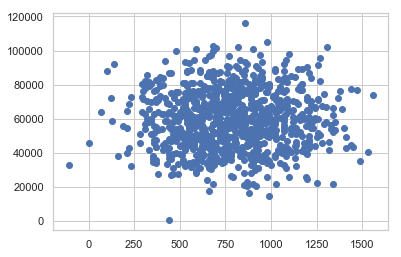

In [91]:
plt.scatter(sales.Daily_Customer_Count,sales.Store_Sales)

In [93]:
x = pd.DataFrame(sales['Daily_Customer_Count'])
y = pd.DataFrame(sales['Store_Sales'])

In [94]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
x2 = add_constant(x)
log= sm.OLS(y,x2)
result = log.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Store_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1676
Date:                Thu, 21 Feb 2019   Prob (F-statistic):              0.682
Time:                        15:27:28   Log-Likelihood:                -10405.
No. Observations:                 931   AIC:                         2.081e+04
Df Residuals:                     929   BIC:                         2.082e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5.861e+04 

# No Relation P value 0.682 value